In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from statsmodels.stats.multitest import multipletests

In [19]:
df = pd.read_csv("270924_1380.txt", sep=", ")

C:\Users\r04km21\AppData\Local\Temp\ipykernel_14984\2964369954.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("270924_1380.txt", sep=", ")


In [20]:
df.columns

Index(['date', 'strain', 'number', 'dots', 'cells'], dtype='object')

In [21]:
df_number = df.groupby(["strain", "number"], as_index=False).sum()
df_number["SE"] = df_number["dots"] * 100 / df_number["cells"]

In [22]:
df_number

strain  number     date  dots  cells         SE
0     795       1   812772    42    174  24.137931
1     795       2   812772    22    154  14.285714
2     795       3   812772    13     93  13.978495
3     897       1   541848     3    105   2.857143
4     897       2   270924     0     64   0.000000
5     897       3   812772     4    107   3.738318
6    1380       1  1083696    18    151  11.920530
7    1380       2   812772    16    134  11.940299
8    1380       3   812772    20    133  15.037594

In [23]:
SE_mean = df_number.groupby("strain").mean()["SE"]
SE_sem = df_number.groupby("strain").std()["SE"].values / np.sqrt(3)

In [24]:
SE_sem

array([3.33645443, 1.12829158, 1.03574233])

In [25]:
SE_mean

strain
795     17.467380
897      2.198487
1380    12.966141
Name: SE, dtype: float64

## Welth's t-test collected with Holm-Sidak

In [26]:
WT_SE = df_number[df_number["strain"] == 795]["SE"]
atg18_SE = df_number[df_number["strain"] == 897]["SE"]
yRL1380_SE = df_number[df_number["strain"] == 1380]["SE"]

In [27]:
statistic, atg18_pvalue = stats.ttest_ind(WT_SE, atg18_SE, equal_var=False)
atg18_pvalue

0.033796553103653704

In [28]:
statistic, yRL1380_pvalue = stats.ttest_ind(WT_SE, yRL1380_SE, equal_var=False)
yRL1380_pvalue

0.30849856013428784

In [29]:
multipletests(pvals=[atg18_pvalue, yRL1380_pvalue], alpha=0.05, method="holm-sidak")

(array([False, False]),
 array([0.0664509 , 0.30849856]),
 0.025320565519103666,
 0.025)

## figure

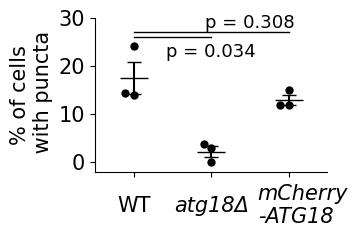

In [34]:
fontsize = 15

fig, ax = plt.subplots(figsize = (3, 2), dpi=100)
sns.swarmplot(x="strain", y="SE", data=df_number, size=6, color="black")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
y_height = -9
ax.text(0, y_height, "WT", ha="center", va="center", fontsize=fontsize)
ax.text(1, y_height, "atg18Δ", ha="center", va="center", fontstyle="italic", fontsize=fontsize)
ax.text(1.6, y_height, "mCherry\n-ATG18", ha="left", va="center", fontstyle="italic", fontsize=fontsize)

ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-2, 30)

y_p = 26
ax.plot([0, 1], [y_p, y_p], color='k', lw=1)
ax.text(1, y_p-4, f'p = {atg18_pvalue:.3f}', ha='center', fontsize=fontsize-2)
y_p2 = 27
ax.plot([0, 2], [y_p2, y_p2], color='k', lw=1)
ax.text(1.5, y_p2+1, f'p = {yRL1380_pvalue:.3f}', ha='center', fontsize=fontsize-2)

ax.set_xticklabels("")
ax.set_xlabel("")
ax.errorbar(x=[0, 1, 2], y=SE_mean, yerr=SE_sem, capsize=5, fmt='_', ecolor='k', ms=20, mfc='None', mec='k')
ax.set_yticks([0, 10, 20, 30])
ax.set_yticklabels(["0", "10", "20", "30"], fontsize=fontsize)
ax.set_ylabel("% of cells\n with puncta", fontsize=fontsize, loc="center")
fig.savefig("output.jpg", bbox_inches="tight")
plt.show()